# **Lab 4 For Data Analytics :- ⚡ ✨**

***Represented by*** :- *Ahmed Elsayed Salama ( **6** ) 💛*  

# Lab 4: Basic text preprocessing and topic modeling

The goal of this assignment is to get familiar with textual data analysis.


**Submission: submit via onq.** 


# **Import Libraries**

In [1]:
!pip install pyLDAvis==3.2.1
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=033d3c9a70cbbd83af1c11a8254d225afaf449528cbaef2bce321b1bd48e0108
  Stored in directory: /root/.cache/pip/wheels/c6/ee/a6/7c17a63623f940dff0b9cbd7e48a27543f088fa55a7d2b62d0
Successfully built pyLDAvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 18.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc.
import pandas as pd
import numpy as np
from zipfile import ZipFile
from nltk.corpus import stopwords
from gensim.test.utils import datapath
import nltk
import re
import string
from nltk.stem import PorterStemmer
from gensim.corpora import Dictionary
import gensim
from gensim.utils import simple_preprocess
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import gensim
import tqdm
import gensim

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Task 1: The given dataset is a table containing questions about R on StackOverflow site. Your first task is to perform standard text prepossessing steps introduced in lectures for future tasks. You can perform analysis on title or body of the questions.

In [3]:
# TODO code for task 1
# TODO write code to perform task 1
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ahmedsalamas/stackoverflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 98% 94.0M/96.3M [00:00<00:00, 121MB/s]
100% 96.3M/96.3M [00:00<00:00, 107MB/s]


In [4]:
zip = ZipFile('/content/stackoverflow.zip')
zip.extractall()
zip.close()

# **Read Csv File**

In [5]:
file=pd.read_csv("/content/Questions.csv")
file

Id  OwnerUserId          CreationDate  Score  \
0          77434      14008.0  2008-09-16T21:40:29Z    171   
1          79709          NaN  2008-09-17T03:39:16Z      3   
2          95007      15842.0  2008-09-18T17:59:19Z     56   
3         103312          NaN  2008-09-19T16:09:26Z      4   
4         255697    1941213.0  2008-11-01T15:48:30Z      4   
...          ...          ...                   ...    ...   
189925  46395878    1823293.0  2017-09-24T23:43:50Z      1   
189926  46395904    8666903.0  2017-09-24T23:49:42Z      2   
189927  46395907    8663707.0  2017-09-24T23:50:13Z      2   
189928  46395927    8061255.0  2017-09-24T23:52:32Z      1   
189929  46395956    8666863.0  2017-09-24T23:57:51Z      0   

                                                    Title  \
0               How to access the last value in a vector?   
1       Worse sin: side effects or passing massive obj...   
2                    Explain the quantile() function in R   
3                      How to test for the EOF flag in R?   
4       Is there an R package for learning a Dirichlet...   
...                                                   ...   
189925  GET command in httr not returning anything aft...   
189926  R-shiny: Discrete value supplied to continuous...   
189927  Confidence interval for quantile regression us...   
189928      Time lag analysis on list of imputed datasets   
189929  How do I conditionally format text in Shiny gi...   

                                                     Body  
0       <p>Suppose I have a vector that is nested in a...  
1       <p>I have a function inside a loop inside a fu...  
2       <p>I've been mystified by the R quantile funct...  
3       <p>How can I test for the <code>EOF</code> fla...  
4       <p>I'm looking for a an <code>R</code> package...  
...                                                   ...  
189925  <p>I'm trying to access NBA's stats api which ...  
189926  <p>So I am using mpg dataset to practice my R-...  
189927  <p>I am trying to get the five types of bootst...  
189928  <p>My question and data is similar to the post...  
189929  <p>I am really stumped. Hopefully someone has ...  

[189930 rows x 6 columns]

In [6]:
titleColumn=file["Title"]
titleColumn

0                 How to access the last value in a vector?
1         Worse sin: side effects or passing massive obj...
2                      Explain the quantile() function in R
3                        How to test for the EOF flag in R?
4         Is there an R package for learning a Dirichlet...
                                ...                        
189925    GET command in httr not returning anything aft...
189926    R-shiny: Discrete value supplied to continuous...
189927    Confidence interval for quantile regression us...
189928        Time lag analysis on list of imputed datasets
189929    How do I conditionally format text in Shiny gi...
Name: Title, Length: 189930, dtype: object

# **1 - Preprocessing**
* Removing HTML Tags .
* Split Into Words .
* Filter Out Punctuation .
* Filter Out Stop Words .
* PorterStemmer .

In [7]:
'''
Preprocessing
Removing HTML tags (Done)
Split into words (Done)
Filter out punctuation (Done)
Filter out stop words (Done) 
porterStemmer (Done)
'''
CLEANR = re.compile('<.*?>') #Removing HTML tags
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext
####  
def preprocess_text(text: str):
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """
    table = str.maketrans(dict.fromkeys(string.punctuation))  # OR {key: None for key in string.punctuation}
    text = text.translate(table)  # Output: string without punctuation
    #Removing HTML tags
    text=cleanhtml(text)
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    ##
    # 1. tokenize
    tokens = nltk.word_tokenize(text) # tokens
    # 2. PorterStemmer
    ps = PorterStemmer()
    for w in range (len(tokens)):
       tokens[w]=ps.stem(tokens[w])# Remove s , es , .er

    # 3. check if stopword
    tokens = [w for w in tokens if not w.lower() in stopwords.words("english")] # remove stopwords
    # 4. join back together
    text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text  



In [8]:
# Clean Each Text .

cleaned_Title=[]
for i in titleColumn:
  cleaned_Title.append(preprocess_text(text=i)) # Call Pre-Processing Function

cleaned_Title  # Cleaned Title

['access last valu vector',
 'wors sin side effect pass massiv object',
 'explain quantil function r',
 'test eof flag r',
 'r packag learn dirichlet prior count data',
 'optim packag r',
 'think vector r',
 'vector think vector oper r',
 'r compil languag',
 'filter data r',
 'oper time interv like',
 'easiest way instal file visual studio setup project',
 'csv file multipl timeseri',
 'doe r quotelik oper like perl qw',
 'write gui brcapro cancer gene risk calcul engin',
 'sort x axi barplot',
 'best practic handl time r',
 'best way avoid pass data frame around',
 'function',
 'remov element list',
 'cumul plot given xaxi',
 'column store compar column base databas',
 'expens comput eigenvalu matrix',
 'color edg draw rect correctli r dendrogram',
 'r random forest variabl import',
 'plot without titleslabel r',
 'find row index contain maximum valu use r',
 'calcul move averag',
 'suppress null devic output r batch mode',
 'best way use r script command line termin',
 'function par

Task 2: Using existing libraries, such as gensim https://radimrehurek.com/gensim/ to learn word embeddings from the prepossessed text from previous step. At the end of this step, you should save the learned word embeddings in a file.

# **2 - Tokenizer**
- Convert Each **String** To **Tokens** .

In [ ]:
# TODO code for task 2
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True :- removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words_tokens = list(sent_to_words(cleaned_Title)) # Work As Tokenizer .


print(data_words_tokens[:50])

[['access', 'last', 'valu', 'vector'], ['wors', 'sin', 'side', 'effect', 'pass', 'massiv', 'object'], ['explain', 'quantil', 'function'], ['test', 'eof', 'flag'], ['packag', 'learn', 'dirichlet', 'prior', 'count', 'data'], ['optim', 'packag'], ['think', 'vector'], ['vector', 'think', 'vector', 'oper'], ['compil', 'languag'], ['filter', 'data'], ['oper', 'time', 'interv', 'like'], ['easiest', 'way', 'instal', 'file', 'visual', 'studio', 'setup', 'project'], ['csv', 'file', 'multipl', 'timeseri'], ['doe', 'quotelik', 'oper', 'like', 'perl', 'qw'], ['write', 'gui', 'brcapro', 'cancer', 'gene', 'risk', 'calcul', 'engin'], ['sort', 'axi', 'barplot'], ['best', 'practic', 'handl', 'time'], ['best', 'way', 'avoid', 'pass', 'data', 'frame', 'around'], ['function'], ['remov', 'element', 'list'], ['cumul', 'plot', 'given', 'xaxi'], ['column', 'store', 'compar', 'column', 'base', 'databas'], ['expens', 'comput', 'eigenvalu', 'matrix'], ['color', 'edg', 'draw', 'rect', 'correctli', 'dendrogram'], [

# **3 - Dictionary of Words**

In [ ]:
# Create dictionary

dictionary = Dictionary(data_words_tokens) # Take tokens  
# Put words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
print(dictionary.token2id)

{'access': 0, 'last': 1, 'valu': 2, 'vector': 3, 'effect': 4, 'object': 5, 'pass': 6, 'side': 7, 'explain': 8, 'function': 9, 'quantil': 10, 'flag': 11, 'test': 12, 'count': 13, 'data': 14, 'learn': 15, 'packag': 16, 'prior': 17, 'optim': 18, 'think': 19, 'oper': 20, 'compil': 21, 'languag': 22, 'filter': 23, 'interv': 24, 'like': 25, 'time': 26, 'easiest': 27, 'file': 28, 'instal': 29, 'project': 30, 'setup': 31, 'studio': 32, 'visual': 33, 'way': 34, 'csv': 35, 'multipl': 36, 'timeseri': 37, 'doe': 38, 'perl': 39, 'calcul': 40, 'engin': 41, 'gene': 42, 'gui': 43, 'risk': 44, 'write': 45, 'axi': 46, 'barplot': 47, 'sort': 48, 'best': 49, 'handl': 50, 'practic': 51, 'around': 52, 'avoid': 53, 'frame': 54, 'element': 55, 'list': 56, 'remov': 57, 'cumul': 58, 'given': 59, 'plot': 60, 'xaxi': 61, 'base': 62, 'column': 63, 'compar': 64, 'databas': 65, 'store': 66, 'comput': 67, 'eigenvalu': 68, 'matrix': 69, 'color': 70, 'correctli': 71, 'dendrogram': 72, 'draw': 73, 'edg': 74, 'forest': 7

## **There are 2803 unique tokens**

# **Bag-of-words ( BOW )**

In [ ]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in data_words_tokens]
corpus
# retrun (id , count)

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1)],
 [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(16, 1), (18, 1)],
 [(3, 1), (19, 1)],
 [(3, 2), (19, 1), (20, 1)],
 [(21, 1), (22, 1)],
 [(14, 1), (23, 1)],
 [(20, 1), (24, 1), (25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(28, 1), (35, 1), (36, 1), (37, 1)],
 [(20, 1), (25, 1), (38, 1), (39, 1)],
 [(40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(46, 1), (47, 1), (48, 1)],
 [(26, 1), (49, 1), (50, 1), (51, 1)],
 [(6, 1), (14, 1), (34, 1), (49, 1), (52, 1), (53, 1), (54, 1)],
 [(9, 1)],
 [(55, 1), (56, 1), (57, 1)],
 [(58, 1), (59, 1), (60, 1), (61, 1)],
 [(62, 1), (63, 2), (64, 1), (65, 1), (66, 1)],
 [(67, 1), (68, 1), (69, 1)],
 [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(75, 1), (76, 1), (77, 1), (78, 1)],
 [(60, 1), (79, 1)],
 [(2, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)],
 [(40, 

Task 3: Perform topic analysis on the prepossessed textual data. Briefly specify how you pick the number of topics. 

Present your findings (the final set of topics you extracted, the popularity of each topic). 

# **Find the optimal number of topics for LDA?**


* One approach to find optimum number of topics is build many LDA models with different values of number of topics and pick the one that **gives highest coherence value**.

* If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

* Sometimes topic keyword may not be enough to make sense of what topic is about. So for better understanding of topics, you can find the documents a given topic has contributed the most to and infer the topic by reading the documents.

* Finally, one needs to understand the volume and distribution of topics in order to judge how widely it was discussed.

# **Experiment**
* We will try for **1 to 10** as the number of topics , to save our time for run the code .
* Calculate **Coherence Score** and get max value .

In [ ]:
coherence_score=[]
for i in range (10): 
  print("*********************** ",i," ***********") 
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=i+1, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
  
  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_tokens, dictionary=dictionary, coherence='u_mass')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_score.append(coherence_lda)
#******************************************************************************


***********************  0  ***********
***********************  1  ***********
***********************  2  ***********
***********************  3  ***********
***********************  4  ***********
***********************  5  ***********
***********************  6  ***********
***********************  7  ***********
***********************  8  ***********
***********************  9  ***********


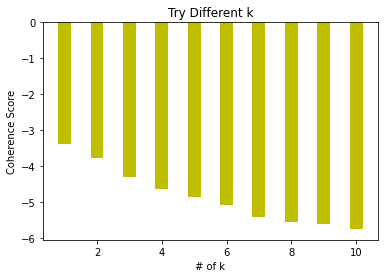

In [ ]:
# creating the bar plot
plt.bar( np.arange(1,11), coherence_score, color ='y',
        width = 0.4)
 
plt.xlabel("# of k")
plt.ylabel("Coherence Score")
plt.title("Try Different k")
plt.show()

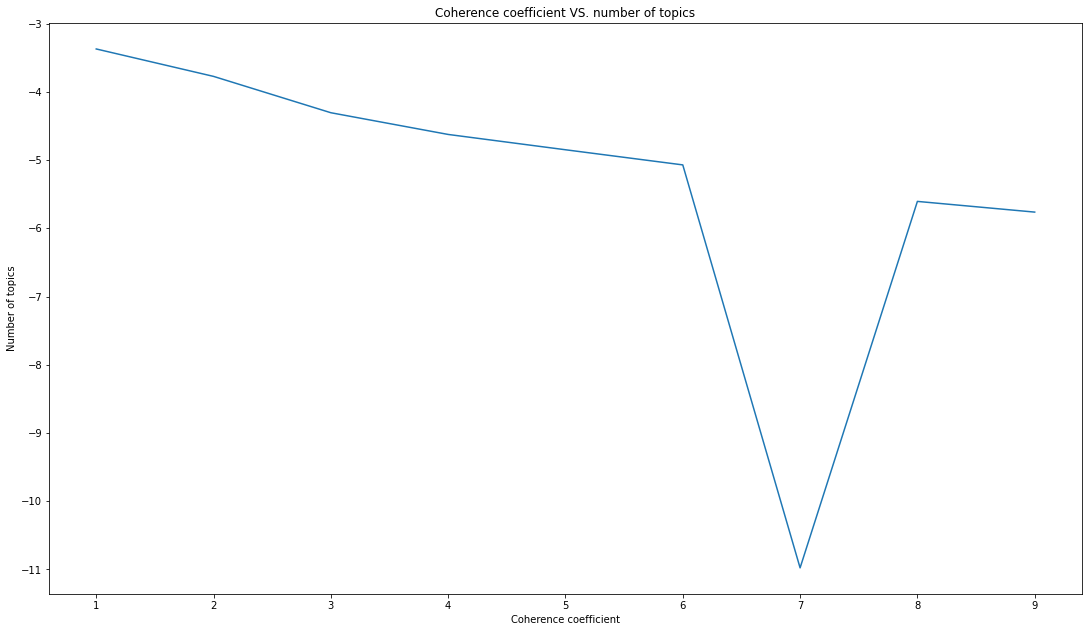

In [11]:
plt.plot(np.arange(1,10), [-3.3721200547555794,-3.7740670370073164,-4.306594680443598,-4.6247891685493645,-4.849192695771494,-5.071015233006437, -5.408845405970035 -5.567182076609172,-5.60597031235355,-5.7627946447027085])
plt.title('Coherence coefficient VS. number of topics')
plt.xlabel('Coherence coefficient')
plt.ylabel('Number of topics')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# **Conclusion :-**
**Output**:

1 - **Lower** the **perplexity** better the model.

2 - **Higher** the topic **coherence**, the topic is more human interpretable.

3- Best value of **k** is may be **6** according to graph  .

In [ ]:
coherence_score

# **Test LDA MODEL for the best k value equal 6**

In [ ]:
# TODO code for task 3, 
# hint, popularity of each topic is the ratio of documents discussing one topic, you neeo red tad the topic assignment for each document and then calculate this value.

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.144*"data" + 0.101*"valu" + 0.062*"row" + 0.054*"frame" + 0.034*"group" + '
  '0.032*"tabl" + 0.021*"model" + 0.018*"regress" + 0.018*"specif" + '
  '0.016*"replac"'),
 (1,
  '0.052*"number" + 0.036*"line" + 0.036*"new" + 0.034*"add" + 0.025*"graph" + '
  '0.022*"filter" + 0.022*"gener" + 0.021*"load" + 0.021*"dataset" + '
  '0.019*"test"'),
 (2,
  '0.065*"plot" + 0.064*"error" + 0.056*"ggplot" + 0.028*"get" + 0.026*"time" '
  '+ 0.023*"date" + 0.021*"chang" + 0.019*"work" + 0.017*"charact" + '
  '0.015*"label"'),
 (3,
  '0.065*"multipl" + 0.064*"shini" + 0.049*"loop" + 0.032*"condit" + '
  '0.030*"dplyr" + 0.027*"extract" + 0.023*"set" + 0.022*"code" + '
  '0.022*"select" + 0.020*"datat"'),
 (4,
  '0.091*"use" + 0.072*"column" + 0.054*"function" + 0.035*"datafram" + '
  '0.033*"variabl" + 0.031*"list" + 0.029*"creat" + 0.023*"differ" + '
  '0.021*"vector" + 0.021*"name"'),
 (5,
  '0.076*"packag" + 0.070*"file" + 0.046*"matrix" + 0.037*"object" + '
  '0.036*"convert" + 0.035*

In [ ]:

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -6.505206185022834


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_tokens, dictionary=dictionary, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -5.071015233006437


# **Save Model**
If you want to save model 

In [ ]:
temp_file = datapath("model")
lda_model.save(temp_file)

In [ ]:
# Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)
lda

#**Visualize The Topics**

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.388685  0.121525       1        1  28.684769
2      0.124932 -0.308963       2        1  19.938360
0      0.254208  0.342299       3        1  16.617300
3      0.036382 -0.032737       4        1  14.001043
5     -0.057495 -0.042592       5        1  11.152892
1      0.030658 -0.079532       6        1   9.605636, topic_info=          Term          Freq         Total Category  logprob  loglift
14        data  23084.000000  23084.000000  Default  30.0000  30.0000
85         use  25366.000000  25366.000000  Default  29.0000  29.0000
2         valu  16211.000000  16211.000000  Default  28.0000  28.0000
63      column  19858.000000  19858.000000  Default  27.0000  27.0000
60        plot  12573.000000  12573.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
603        per    900.793277    901.600986   Topic6  -4.6365   2.3419
460       iter    872.357416    873.164043   Topic6  -4.6686   2.3419
233  histogram    845.157644    845.963924   Topic6  -4.7003   2.3419
196    program    818.306564    819.112745   Topic6  -4.7326   2.3418
632     method    811.877323    812.685378   Topic6  -4.7405   2.3418

[210 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
484       2  0.999801       ad
132       6  0.999812      add
352       5  0.999853    anoth
2088      2  0.999553      app
236       1  0.999631    appli
...     ...       ...      ...
203       5  0.999730   window
219       1  0.999785   within
79        1  0.999434  without
867       6  0.999741     word
378       2  0.999797     work

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 6, 2])

# **Conclusion**
The best **k** value equal **6** :-

1-  **Coherence Score**:  **-5.071015233006437** .

2- **Perplexity**:  **-6.505206831694535** .

3- As u see the model could **Cluster Topics** 1 , 2 , 3 **Very Well** .

4- **Confused** little bit with 4, 5, 6 Topics ( Cannot cluster each one seperated ).

# **Thank you for your effort for correcting that 💫🥰**